reference: https://github.com/kzbkzb/Python-AI/blob/main

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import glob

### import training data

for Class in **class_lst**

-   cd Training_13_6G
   
-   ls * > class_lst

#### `ls -R */*.png`

`tar -cvf test.tar $(ls)`

`split -n5 test.tar test_part`

- result: Cat/Cat-BlueBerry.png

把train_lst划分为5个(tbd)，parallel

(256, 256, 3)


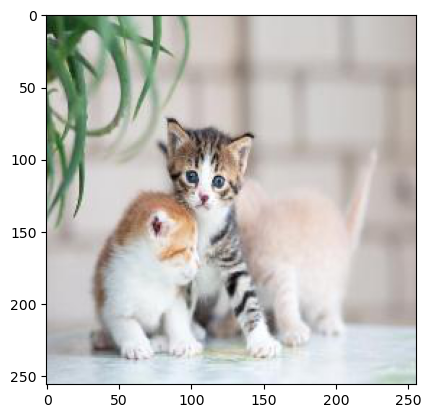

In [4]:
train_main = 'E:\\605Proj\\test_training'  ## train_main = "Training_13_6G"
train_image_path = []
for Class in ['Cat', 'Dog']:  ## for Class in class_lst:
    lst_class = glob.glob(os.path.join(train_main, Class, '*jpg'))
    for i in lst_class:
        train_image_path.append(i)
img = Image.open(train_image_path[8])
print(np.asarray(img, dtype = np.uint8).shape)
#print(np.asarray(img, dtype = np.uint8)) ### hidden vector? -> initialize class
plt.imshow(img)

(256, 256, 3)


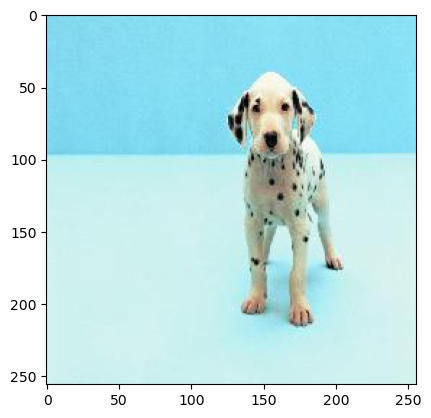

In [79]:
train_main = 'E:\\605Proj\\test_training'  ## train_main = "Training_13_6G"
for Class in ['Cat', 'Dog']:  ## for Class in class_lst:
    for i in range(1, 4):  ## 10000
        image = Class + '-Train' + ' (' + str(i) + ').jpg'
        #print(image)
        path = os.path.join(train_main, Class, image)
        #print(path)
img = Image.open(path)
print(np.asarray(img, dtype = np.uint8).shape)
#print(np.asarray(img, dtype = np.uint8)) ### hidden vector? -> initialize class
plt.imshow(img)

### Label -> if we use cnn or lstm?

n class -> n-dim one hot

In [80]:
train_image_path[0].split('\\')[-2]

'Cat'

In [81]:
## label
train_image_label = [int(p.split('\\')[-2][0:3] == 'Cat') for p in train_image_path]
#train_image_label

#### use `ls`
url = ['Cat/Cat-BlueBerry.png', ...]

label = url[i].split('/')[0]

build 0 matrix -> 对应的label的位置是1

### data process

In [6]:
batch_size = 8 ## 一次读入几个数据
img_height = 256
img_width = 256

In [43]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'E:/605Proj/samll_train',  ## directory
    validation_split= 0.2, ##0.2, ###
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 24 files for training.


In [44]:
'''
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'E:/605Proj/Training Data/Training Data',  ## directory
    validation_split= 0., ##0.2, ###
    #subset="training",
    #seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)
'''

'\ntrain_ds_test = tf.keras.preprocessing.image_dataset_from_directory(\n    \'E:/605Proj/Training Data/Training Data\',  ## directory\n    validation_split= 0., ##0.2, ###\n    #subset="training",\n    #seed=12,\n    image_size=(img_height, img_width),\n    batch_size=batch_size)\n'

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'E:/605Proj/samll_train',
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 6 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['Beetle', 'Butterfly', 'Cat', 'Cow', 'Dog']


In [27]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 256, 256, 3)
(8,)


### Model

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

def preprocess_image(image,label):
    return (image/255.0,label)

# 归一化处理
train_ds = train_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
val_ds   = val_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

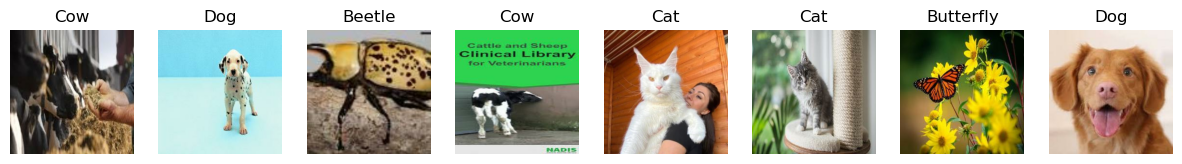

In [29]:
plt.figure(figsize=(15, 10))  # 图形的宽为15高为10

for images, labels in train_ds.take(1):
    for i in range(8):
        
        ax = plt.subplot(5, 8, i + 1) 
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        
        plt.axis("off")

### VG-16 Network

In [161]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def VGG16(nb_classes, input_shape):
    input_tensor = Input(shape=input_shape)
    # 1st block
    x = Conv2D(64, (3,3), activation='relu', padding='same',name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3,3), activation='relu', padding='same',name='block1_conv2')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'block1_pool')(x)
    # 2nd block
    x = Conv2D(128, (3,3), activation='relu', padding='same',name='block2_conv1')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same',name='block2_conv2')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'block2_pool')(x)
    # 3rd block
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='block3_conv1')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='block3_conv2')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same',name='block3_conv3')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'block3_pool')(x)
    # 4th block
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block4_conv1')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block4_conv2')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block4_conv3')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'block4_pool')(x)
    # 5th block
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block5_conv1')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block5_conv2')(x)
    x = Conv2D(512, (3,3), activation='relu', padding='same',name='block5_conv3')(x)
    x = MaxPooling2D((2,2), strides=(2,2), name = 'block5_pool')(x)
    # full connection
    x = Flatten()(x)
    x = Dense(4096, activation='relu',  name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    output_tensor = Dense(nb_classes, activation='softmax', name='predictions')(x)

    model = Model(input_tensor, output_tensor)
    return model

model=VGG16(1000, (img_width, img_height, 3))
#model.summary()

In [31]:
model.compile(optimizer="adam",
              loss     ='sparse_categorical_crossentropy',
              metrics  =['accuracy'])

In [32]:
from tqdm import tqdm
import tensorflow.keras.backend as K

epochs = 10
lr     = 1e-4

# 记录训练数据，方便后面的分析
history_train_loss     = []
history_train_accuracy = []
history_val_loss       = []
history_val_accuracy   = []

for epoch in range(epochs):
    train_total = len(train_ds)
    val_total   = len(val_ds)
    
    """
    total：预期的迭代数目
    ncols：控制进度条宽度
    mininterval：进度更新最小间隔，以秒为单位（默认值：0.1）
    """
    with tqdm(total=train_total, desc=f'Epoch {epoch + 1}/{epochs}',mininterval=1,ncols=100) as pbar:
        
        lr = lr*0.92
        K.set_value(model.optimizer.lr, lr)
        
        for image,label in train_ds:      
            """
            训练模型，简单理解train_on_batch就是：它是比model.fit()更高级的一个用法
            """
            history = model.train_on_batch(image,label)
            
            train_loss     = history[0]
            train_accuracy = history[1]
            
            pbar.set_postfix({"loss": "%.4f"%train_loss,
                              "accuracy":"%.4f"%train_accuracy,
                              "lr": K.get_value(model.optimizer.lr)})
            pbar.update(1)
        history_train_loss.append(train_loss)
        history_train_accuracy.append(train_accuracy)
            
    print('开始验证！')
    
    with tqdm(total=val_total, desc=f'Epoch {epoch + 1}/{epochs}',mininterval=0.3,ncols=100) as pbar:

        for image,label in val_ds:      
            
            history = model.test_on_batch(image,label)
            
            val_loss     = history[0]
            val_accuracy = history[1]
            
            pbar.set_postfix({"loss": "%.4f"%val_loss,
                              "accuracy":"%.4f"%val_accuracy})
            pbar.update(1)
        history_val_loss.append(val_loss)
        history_val_accuracy.append(val_accuracy)
            
    print('结束验证！')
    print("验证loss为：%.4f"%val_loss)
    print("验证准确率为：%.4f"%val_accuracy)

Epoch 1/10: 100%|████████████| 3/3 [00:24<00:00,  8.07s/it, loss=6.8058, accuracy=0.0000, lr=9.2e-5]


开始验证！


Epoch 1/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it, loss=6.4523, accuracy=0.0000]


结束验证！
验证loss为：6.4523
验证准确率为：0.0000


Epoch 2/10: 100%|███████████| 3/3 [00:21<00:00,  7.14s/it, loss=2.9151, accuracy=0.1250, lr=8.46e-5]


开始验证！


Epoch 2/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.35s/it, loss=3.6564, accuracy=0.0000]


结束验证！
验证loss为：3.6564
验证准确率为：0.0000


Epoch 3/10: 100%|███████████| 3/3 [00:24<00:00,  8.31s/it, loss=2.1137, accuracy=0.2500, lr=7.79e-5]


开始验证！


Epoch 3/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.69s/it, loss=1.6896, accuracy=0.3333]


结束验证！
验证loss为：1.6896
验证准确率为：0.3333


Epoch 4/10: 100%|███████████| 3/3 [00:24<00:00,  8.25s/it, loss=2.3847, accuracy=0.1250, lr=7.16e-5]


开始验证！


Epoch 4/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it, loss=2.4453, accuracy=0.0000]


结束验证！
验证loss为：2.4453
验证准确率为：0.0000


Epoch 5/10: 100%|███████████| 3/3 [00:25<00:00,  8.59s/it, loss=1.8525, accuracy=0.3750, lr=6.59e-5]


开始验证！


Epoch 5/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it, loss=2.5371, accuracy=0.0000]


结束验证！
验证loss为：2.5371
验证准确率为：0.0000


Epoch 6/10: 100%|███████████| 3/3 [00:25<00:00,  8.34s/it, loss=1.4794, accuracy=0.3750, lr=6.06e-5]


开始验证！


Epoch 6/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.70s/it, loss=2.2665, accuracy=0.0000]


结束验证！
验证loss为：2.2665
验证准确率为：0.0000


Epoch 7/10: 100%|███████████| 3/3 [00:25<00:00,  8.49s/it, loss=1.9184, accuracy=0.1250, lr=5.58e-5]


开始验证！


Epoch 7/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it, loss=1.7285, accuracy=0.3333]


结束验证！
验证loss为：1.7285
验证准确率为：0.3333


Epoch 8/10: 100%|███████████| 3/3 [00:25<00:00,  8.38s/it, loss=1.6163, accuracy=0.2500, lr=5.13e-5]


开始验证！


Epoch 8/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it, loss=1.7144, accuracy=0.1667]


结束验证！
验证loss为：1.7144
验证准确率为：0.1667


Epoch 9/10: 100%|███████████| 3/3 [00:24<00:00,  8.09s/it, loss=1.4863, accuracy=0.3750, lr=4.72e-5]


开始验证！


Epoch 9/10: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it, loss=1.6613, accuracy=0.1667]


结束验证！
验证loss为：1.6613
验证准确率为：0.1667


Epoch 10/10: 100%|██████████| 3/3 [00:25<00:00,  8.39s/it, loss=1.6334, accuracy=0.0000, lr=4.34e-5]


开始验证！


Epoch 10/10: 100%|██████████████████████| 1/1 [00:01<00:00,  1.76s/it, loss=1.7142, accuracy=0.0000]

结束验证！
验证loss为：1.7142
验证准确率为：0.0000


### evaluation

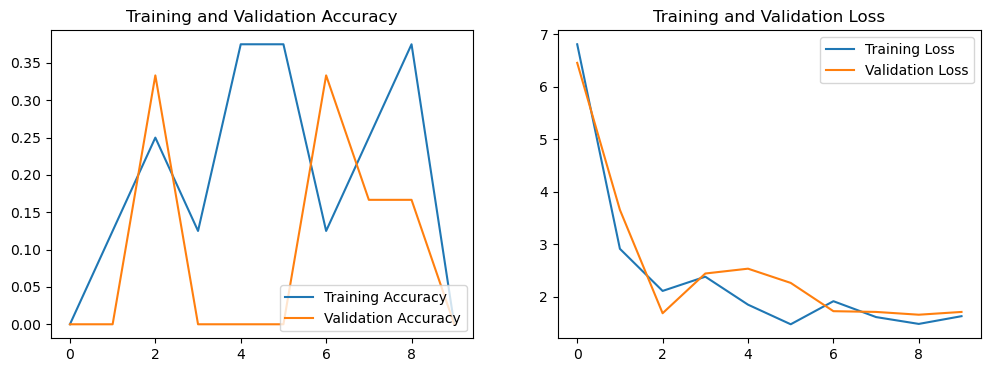

In [33]:
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, history_train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, history_val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_train_loss, label='Training Loss')
plt.plot(epochs_range, history_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
# ## save model
# model.save('path/model.h5')
# ## load model
# new_model = tf.keras.models.load_model('path/model.h5')

### predict

1/1 [==============================] - 0s 302ms/step


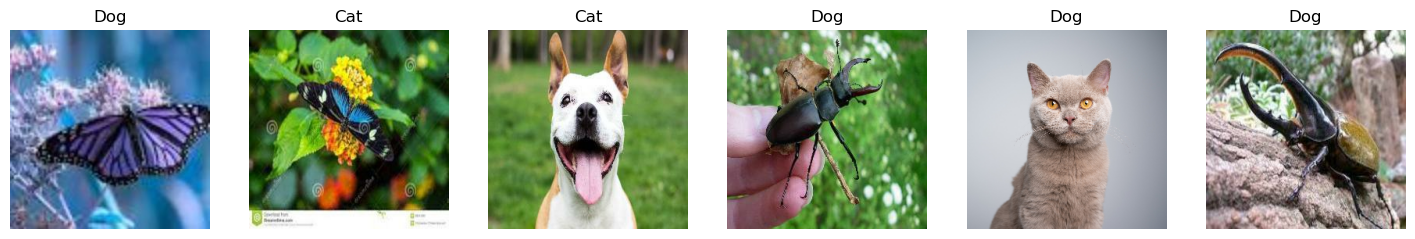

In [36]:
plt.figure(figsize=(18, 3))  # 图形的宽为18高为5
#plt.suptitle("预测结果展示")

for images, labels in val_ds.take(1):
    for i in range(6):
        ax = plt.subplot(1,6, i + 1)  
        
        # 显示图片
        plt.imshow(images[i].numpy())
        
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(images[i], 0) 
        
        # 使用模型预测图片中的人物
        predictions = model.predict(img_array)
        plt.title(class_names[np.argmax(predictions)])

        plt.axis("off")

### Xception

In [141]:
batch_size = 12
img_height = 256
img_width  = 256

In [142]:
data_dir = "E:/605Proj/samll_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 24 files for training.


In [143]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 6 files for validation.


In [144]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(12, 256, 256, 3)
(12,)


In [145]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds.cache()
    .shuffle(1000)
#     .map(train_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)           # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds.cache()
    .shuffle(1000)
#     .map(val_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)         # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

In [146]:
#====================================#
#     Xception的网络部分
#====================================#
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,BatchNormalization,Activation,Conv2D,SeparableConv2D,MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions


def Xception(input_shape = [256,256,3],classes=1000):

    img_input = Input(shape=input_shape)
    
    #=================#
    #   Entry flow
    #=================#
    #  block1
    # 256,256,3 -> 149,149,64
    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False, name='block1_conv1')(img_input)
    x = BatchNormalization(name='block1_conv1_bn')(x)
    x = Activation('relu', name='block1_conv1_act')(x)
    x = Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = BatchNormalization(name='block1_conv2_bn')(x)
    x = Activation('relu', name='block1_conv2_act')(x)


    # block2
    # 149,149,64 -> 75,75,128
    residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = BatchNormalization(name='block2_sepconv1_bn')(x)
    x = Activation('relu', name='block2_sepconv2_act')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = BatchNormalization(name='block2_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    # block3
    # 75,75,128 -> 38,38,256
    residual = Conv2D(256, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block3_sepconv1_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = BatchNormalization(name='block3_sepconv1_bn')(x)
    x = Activation('relu', name='block3_sepconv2_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = BatchNormalization(name='block3_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    # block4
    # 38,38,256 -> 19,19,728
    residual = Conv2D(728, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block4_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv1')(x)
    x = BatchNormalization(name='block4_sepconv1_bn')(x)
    x = Activation('relu', name='block4_sepconv2_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv2')(x)
    x = BatchNormalization(name='block4_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block4_pool')(x)
    x = layers.add([x, residual])

    #=================#
    # Middle flow
    #=================#
    # block5--block12
    # 19,19,728 -> 19,19,728
    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv1')(x)
        x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv2')(x)
        x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv3')(x)
        x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

        x = layers.add([x, residual])

    #=================#
    #    Exit flow
    #=================#
    # block13
    # 19,19,728 -> 10,10,1024
    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block13_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block13_sepconv1')(x)
    x = BatchNormalization(name='block13_sepconv1_bn')(x)
    x = Activation('relu', name='block13_sepconv2_act')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False, name='block13_sepconv2')(x)
    x = BatchNormalization(name='block13_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block13_pool')(x)
    x = layers.add([x, residual])

    # block14
    # 10,10,1024 -> 10,10,2048
    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False, name='block14_sepconv1')(x)
    x = BatchNormalization(name='block14_sepconv1_bn')(x)
    x = Activation('relu', name='block14_sepconv1_act')(x)

    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False, name='block14_sepconv2')(x)
    x = BatchNormalization(name='block14_sepconv2_bn')(x)
    x = Activation('relu', name='block14_sepconv2_act')(x)

    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    inputs = img_input

    model = Model(inputs, x, name='xception')

    return model

In [147]:
model = Xception()
# 打印模型信息
#model.summary()

In [148]:
# 设置初始学习率
initial_learning_rate = 1e-4

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, 
        decay_steps=300,      # 敲黑板！！！这里是指 steps，不是指epochs
        decay_rate=0.96,     # lr经过一次衰减就会变成 decay_rate*lr
        staircase=True)

# 将指数衰减学习率送入优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [149]:
model.compile(optimizer=optimizer,
              loss     ='sparse_categorical_crossentropy',
              metrics  =['accuracy'])

In [150]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 26s 7s/step - loss: 6.7432 - accuracy: 0.0000e+00 - val_loss: 6.9060 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 11s 6s/step - loss: 5.7913 - accuracy: 0.7083 - val_loss: 6.9036 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 11s 6s/step - loss: 4.9077 - accuracy: 1.0000 - val_loss: 6.9013 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 11s 6s/step - loss: 4.1455 - accuracy: 1.0000 - val_loss: 6.8990 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 13s 7s/step - loss: 3.3617 - accuracy: 1.0000 - val_loss: 6.8965 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 13s 7s/step - loss: 2.5253 - accuracy: 1.0000 - val_loss: 6.8938 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 13s 7s/step - loss: 1.7148 - accuracy: 1.0000 - val_loss: 6.8909 - val_accuracy: 0.1667
Epoch 

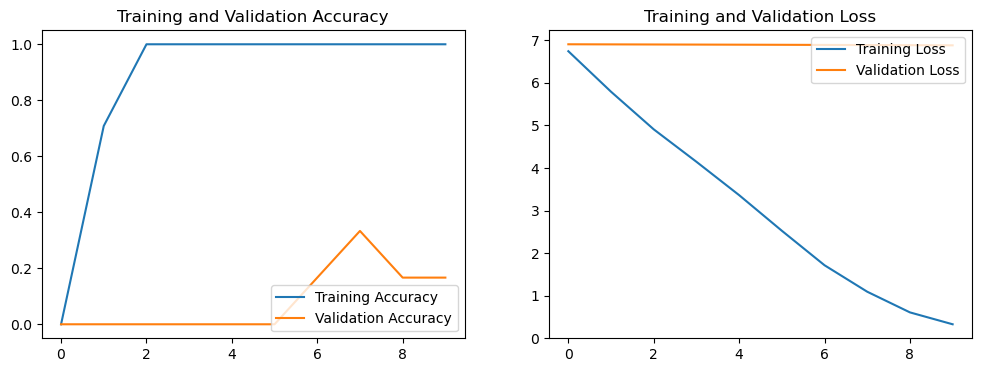

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions):
    
    # 生成混淆矩阵
    conf_numpy = confusion_matrix(labels, predictions)
    # 将矩阵转化为 DataFrame
    conf_df = pd.DataFrame(conf_numpy, index=class_names ,columns=class_names)  
    
    plt.figure(figsize=(8,7))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)

In [153]:
val_pre   = []
val_label = []

for images, labels in val_ds:#这里可以取部分验证数据（.take(1)）生成混淆矩阵
    for image, label in zip(images, labels):
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(image, 0) 
        # 使用模型预测图片中的人物
        prediction = model.predict(img_array)

        val_pre.append(class_names[np.argmax(prediction)])
        val_label.append(class_names[label])

#plot_cm(val_label, val_pre)

1/1 [==============================] - 0s 225ms/step


In [154]:
conf_numpy = confusion_matrix(val_label, val_pre)
lst = ['Beetle', 'Butterfly', 'Cat', 'Dog']
conf_df = pd.DataFrame(conf_numpy, index=lst,columns=lst)
conf_df

,Beetle,Butterfly,Cat,Dog
Beetle,0,0,2,0
Butterfly,0,0,2,0
Cat,0,0,1,0
Dog,0,0,1,0


Text(0.5, 23.52222222222222, 'pre')

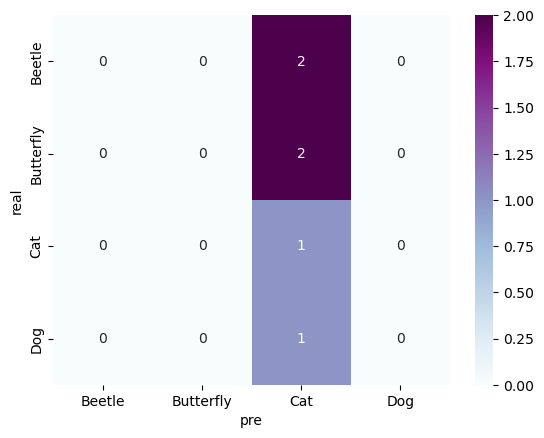

In [155]:
#plt.figure(figsize=(8,7))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
#plt.title('混淆矩阵',fontsize=15)
plt.ylabel('real')#,fontsize=14)
plt.xlabel('pre')#,fontsize=14)

1/1 [==============================] - 0s 147ms/step


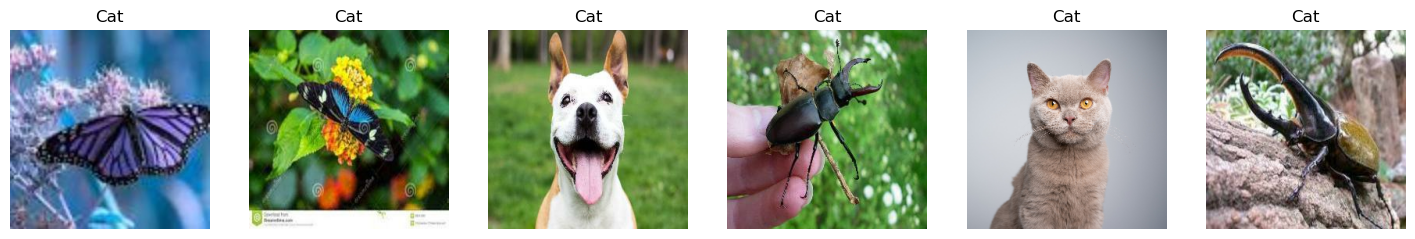

In [160]:
plt.figure(figsize=(18, 3))  # 图形的宽为18高为5

for images, labels in val_ds:
    for i in range(6):
        ax = plt.subplot(1,6, i+1)
        
        img_truncated = np.clip(images[i].numpy(), 0, 255).astype(np.uint8)
        plt.imshow(img_truncated)
 
        img_array = tf.expand_dims(image, 0)     
        prediction = model.predict(img_array)
        
        plt.title(class_names[np.argmax(predictions)])

        plt.axis("off")

## 配置GPU

In [158]:
'''
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")
    
# 打印显卡信息，确认GPU可用
print(gpus)
'''

'\nimport tensorflow as tf\ngpus = tf.config.list_physical_devices("GPU")\n\nif gpus:\n    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用\n    tf.config.set_visible_devices([gpus[0]],"GPU")\n    \n# 打印显卡信息，确认GPU可用\nprint(gpus)\n'

GPU（图形处理单元）通常被认为是一种并行计算的强大工具。GPU 是设计用来处理图形渲染任务的硬件，但由于其并行计算能力，它在许多其他领域，尤其是深度学习和科学计算中也得到了广泛的应用。